# Computer lab 1: Building a simple financial calculator

The present value of an ordinary annuity is calculated as:

$PV = PMT * \frac{1-\frac{1}{1+R}^N}{R}$

where:
* PV is the present value
* PMT is the cash flow per period
* R is the discount rate per period
* N is the number of periods for which one will receive the cash flows

## Exercise 1

A function to calculate the present value of an annuity

In [3]:
def annuityPv(pmt, r, n):
    """
    Calculates the present value of an annuity
    
    pmt : the cash flow per period
    r   : the discount rate per period
    n   : number of periods (years)
    """
    pv = pmt * (1 - (1/(1 + r)**n)) / r
    return pv

In [4]:
# Try the following
PMT = 5000
R   = 0.05 
N   = 10   

In [5]:
print ("PV = {:<10.2f} $Py".format(annuityPv(PMT, R, N)))

PV = 38608.67   $Py


## Exercise 2

A function for calculating the present value of a coupon bond,
given that the principal is paid back at the same time as the last coupom.

The present value of a future value is calculated as follows:

$PV = \frac{FV}{(1 + R)^n}$

where:

* FV is the future value
* R is the discount rate per period
* n is the number of periods

In [6]:
def bondPv(coupon, r, n, fv):
    """
    Calculates the present value of a bond (pays principal at the end of the period)
    
    coupon: monthly payments
    r     : discount rate
    n     : number of years
    fv    : principal
    """
    month = annuityPv(coupon, r, n) #Discounted monthly payments
    princ = fv / (1 + R) ** n       #Discounted principal
    return month + princ

In [7]:
# Try the following
R      = 0.05
N      = 10
Coupon = 100
FV     = 1000

In [8]:
print ("PV = {:<10.2f} $Py".format(bondPv(Coupon, R, N, FV)))

PV = 1386.09    $Py


## Exercise 3

Computing the sensivity of the bond price to changes in the discount rate

In [9]:
import numpy as np

In [10]:
# Try the following
coupon = 100
n      = 10
fv     = 1000
rate   = np.arange(0.03,0.16,0.01) # An array with rates varying by 1%

In [11]:
output = bondPv(coupon, rate, n, fv)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

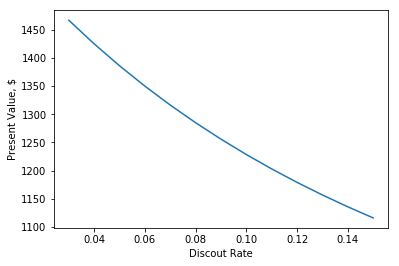

In [13]:
fig = plt.figure(figsize=(6,4))
plt.plot(rate, output)
plt.ylabel("Present Value, $")
plt.xlabel("Discout Rate")
plt.show()

## Exercise 4

Write a function to calculate how much to save per year for retirement of an immortal.

The present value of a perpetuity value is calculated as follows:

$PV = \frac{CF}{R}$

where:

* CF is the cash flow to receive each period
* R is the discount rate per period

In [14]:
def annualRequiredSavings(n, cf, r):
    """
    Calculates the annual savings for retirement of an immortal (perpetuity)
    
    n     : number of periods till retirement
    cf    : cash flow to be received per period
    r     : discount rate
    """
    perp_pv = cf / r  # Present value of perpetuity at retirement 
    pres_pv = perp_pv / (1 + r) ** n  # Present value of the 'future' present value above
    pmt     = pres_pv / ((1 - (1/(1 + r)**n)) / r)  # Deposits per period
    return pmt

In [15]:
# Try this
X = 10000
N = 40
R = 0.07

In [16]:
print ("Annual savings = $Py {:<10.2f}".format(annualRequiredSavings(N, X, R)))

Annual savings = $Py 715.59    


In [17]:
new_R = 0.02
print ("Annual savings = $Py {:<10.2f}".format(annualRequiredSavings(N, X, new_R)))

Annual savings = $Py 8277.87   


As expected, lower rates would require much larger deposits

In [18]:
new_N = 30
print ("Annual savings = $Py {:<10.2f}".format(annualRequiredSavings(new_N, X, R)))

Annual savings = $Py 1512.34   


As expected, less time to retire would require larger yearly savings

## Exercise 5

Add an option to the previous function to compute the ammount needed to save monthly

The appropriate monthly discount rate, M, can be calculated by solving:

$1 + R = (1 + M)^{12}$

In [19]:
def annualRequiredSavings(n, cf, r, monthly=False):
    """
    Calculates the annual (or monthly) savings for retirement of an immortal (perpetuity)
    
    n     : number of periods till retirement
    cf    : cash flow to be received per period
    r     : discount rate
    monthly : whether or not to consider the periods as months rather than years
    """
    perp_pv = cf / r  # Present value of perpetuity at retirement 
    pres_pv = perp_pv / (1 + r) ** n  # Present value of the 'future' present value above
    
    if monthly:
        r  = (1 + r) ** (1/12) - 1   # monthly discount rate
        n *= 12  # number of periods in months
    else:
        pass
    
    return pres_pv / ((1 - (1/(1 + r)**n)) / r)

In [22]:
# Trying the same
X = 10000
N = 40
R = 0.07

In [23]:
print ("Monthly savings = $Py {:<10.2f}".format(annualRequiredSavings(N, X, R, True)))

Monthly savings = $Py 57.80     
